<center>  <img src="images/header.png"> </center> 

## <center>  Семестровый проект </center>
# <center>"Предсказание оценки фильма на IMDb по тексту отзыва" </center>

In [6]:
import pandas as pd
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Задача
Обучить модель, которая по тексту отзыва будет рекомендовать пользователю адекватную оценку фильму.

## Зачем это нужно?
<center> <img src="images/star_ratings.png"> </center>

- Пользователь ставит оценку фильму, исходя из субъективного восприятия числового значения оценки.
- В итоге получаем оценку, которую невозмонжо однозначно итерпретировать (что хотел сказать автор?).

### Поэтому
Будем предлагать пользвателю адекватную оценку, исходя из текста его отзыва.

## Получаем
Задачу классификации текстов с учителем.


### Чем будем измерять качество?
Поскольку оценка фильма - вещь довольно субъективная, будем стремиться уменьшить MAE. 

### Минимальный порог качества
- Если модель в среднем ошибается на 1 балл, значит она очень хорошо понимает тексты. 
- Добившись такого MAE, мы получим модель, которая понимает, что пользователь думает о фильме, и предлагает ему подходящую оценку.
(Не забываем, что оценку ставят люди, которые сами не очень-то шарят, что значит какая циферка)

#### Представим, что данная задача решалась бы ручным трудом. 
<center> <img src = "images/choice2.png">  </center>
Тогда предлагаемые оценки очень сильно будут зависеть от настроения человека, который принисает решение. Примерно это же сейчас и происходит - в результате получаем оценку, которая складывается не только из впечатлений о фильмне, но и из общего состояния оценивающего. 


Я ХЗ, ТУТ НАДО НАПИСАТЬ ТИПА ЧТО НА 1 БАЛЛ ОШИБАТЬСЯ НОРМУЛЬ, НАРОД САМ НЕ ОСОБО ШАРИТ, ЧЕМ 5 И 6 БАЛЛОВ ОТЛИЧАЮТСЯ, НАПРИМЕР

# Сбор данных

Для обучения мы выкачали все отзывы на фильмы из Top-250 и почти все отзывы на фильмы 2016 года. Для парсинга сайта использовалась библиотека `BeautifulSoup`. Все строго по закону - данные в открытом доступе.

Мы получили
- **400 000 отзывов**,

а это целых  
- **500 мб текста**

для 
- **1700 фильмов**.

## Предобработка данных

Текстовые данные требуют допольнительной предобработки, поэтому мы выполнили
- предварительную нормализацию данных;
- стемминг.

После многочисленных экспериментов стоп-слова решили не удалять, поскольку они влияют на n-граммы.


ВОТ ТУТ БОМБИЧЕСКИЙ ЕВГЕНИЙ ДОЛЖЕН СПЕТЬ ТИРАДУ СВОИМ СПОСОБНОСТЯМ В ПРЕДОБРАБОТКЕ

## Данные

In [ ]:
reviews = pd.read_csv('stemmed.csv')

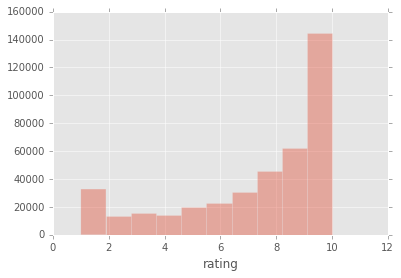

In [51]:
sns.distplot(reviews.rating, bins=10, kde=False) 
plt.show()

Нормализуем данные

In [48]:
S = np.argsort(reviews.rating.value_counts().index)
ratingCounts = reviews.rating.value_counts().values[S]
proba = map(lambda x: 1.0/x, ratingCounts)
print proba
row_proba = map(lambda x: proba[int(x)-1], reviews.rating)
row_proba /= sum(row_proba)
idx = (np.random.choice(reviews.index, size=100000, replace=False, p=row_proba))
reviews_normed = reviews.loc[idx,:]

[3.0507337014552e-05, 7.265329845975008e-05, 6.415191172696946e-05, 6.89464975179261e-05, 5.0461724781753044e-05, 4.39734400422145e-05, 3.294458720432233e-05, 2.1918769041930604e-05, 1.607665348381081e-05, 6.89731280693042e-06]


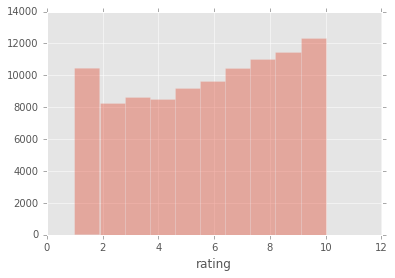

In [49]:
sns.distplot(reviews_normed.rating, bins=10, kde=False) 
plt.show()